## Crea un módulo que contenga las siguientes funciones:

In [1]:
import pandas as pd
import numpy as np

Calcula el retorno diario de un dataframe con los precios diarios

In [1]:
def retorno_diario(data):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    '''
    retornos = np.log(data).diff().dropna()
    return retornos


Calcula el retorno anualizado 

In [3]:
def retorno_anualizado(data):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    '''
    data_anual = data.resample('y').last()
    retornos = np.log(data_anual).diff().dropna()
    return retornos

Calcule la correlación rolada, con el periodo como parámetro

In [4]:
def correlacion(data, ventana=10):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    ventana: número de días para calcular la correlación
    '''
    corr = data.rolling(ventana).corr()
    return corr

Calcula la beta

In [5]:
def beta(data,index_col=0):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    '''
    retornos = retorno_diario(data)
    covariance_matrix = retornos.cov()
    variance = retornos.iloc[:,index_col].var()
    beta = covariance_matrix.iloc[:,index_col]/variance
    return beta

## Prueba tus funciones en los siguientes ejercicios, si crees que falta alguna función sientete libre de crearla.

Calcula la serie de retornos anuales  del Ibex con dividendos y del Ibex.

In [6]:
# cargamos los datos
# ibex = pd.read_csv('data/ibex.csv', index_col=0, parse_dates=True).close
# ibex_div = pd.read_csv('data/ibex_div.csv', index_col=0, parse_dates=True).close
ibex = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/finanzas_con_python/Finanzas-y-Tecnolog%C3%ADa/4_pandas/data/ibex.csv', index_col=0, parse_dates=True).close
ibex_div = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/finanzas_con_python/Finanzas-y-Tecnolog%C3%ADa/4_pandas/data/ibex_div.csv', index_col=0, parse_dates=True).close
data = pd.concat([ibex, ibex_div], axis=1).dropna()
data.columns = ['ibex', 'ibex_div']

In [7]:
retornos_anuales = retorno_anualizado(data)

Realiza un gráfico de barras comparándolos.

<Axes: >

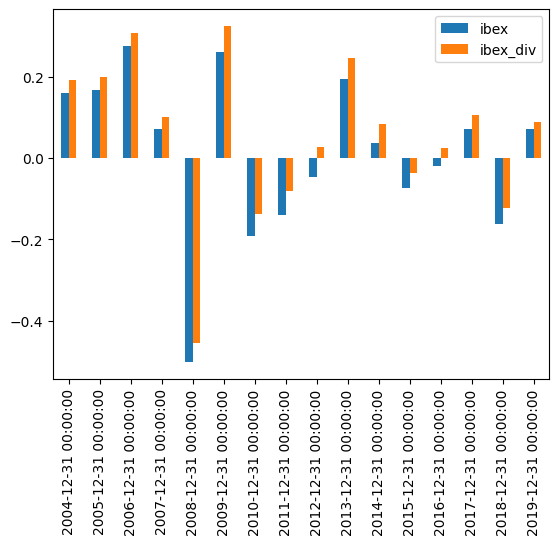

In [8]:
retornos_anuales.plot.bar()

Compara los retornos anuales del Ibex con los de SAN.

<Axes: >

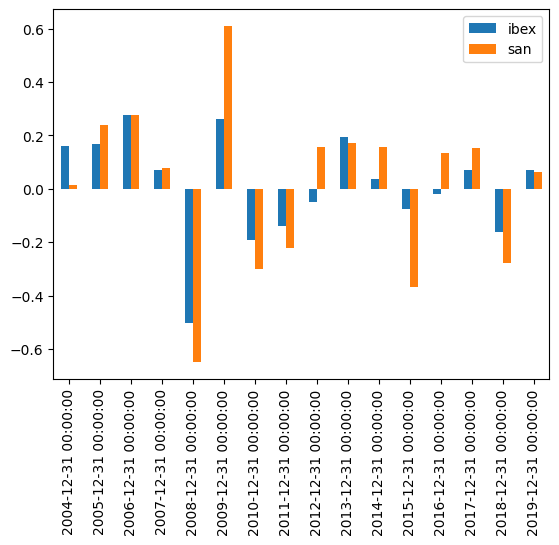

In [11]:
#san = pd.read_csv('data/SAN.csv', index_col=0, parse_dates=True).close
san = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/finanzas_con_python/Finanzas-y-Tecnolog%C3%ADa/4_pandas/data/SAN.csv', index_col=0, parse_dates=True).close
data = pd.concat([ibex, san], axis=1).dropna()
data.columns = ['ibex', 'san']
retornos_anuales = retorno_anualizado(data)
retornos_anuales.plot.bar()

Calcula la correlación del SAN, REE y NTGY con el IBEX con dividendos.

In [10]:
# ree = pd.read_csv('data/REE.csv', index_col=0, parse_dates=True).close
# ntgy = pd.read_csv('data/NTGY.csv', index_col=0, parse_dates=True).close
ree = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/finanzas_con_python/Finanzas-y-Tecnolog%C3%ADa/4_pandas/data/REE.csv', index_col=0, parse_dates=True).close
ntgy = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/finanzas_con_python/Finanzas-y-Tecnolog%C3%ADa/4_pandas/data/NTGY.csv', index_col=0, parse_dates=True).close
data = pd.concat([ibex_div, san, ree, ntgy], axis=1).dropna()
data.columns = ['ibex_div', 'san', 'ree', 'ntgy']

In [63]:
corr_data = data.corr()

Ahora calcula la correlación rolada de 100 días para los activos del ejercico anterior.

In [64]:
corr_roll = correlacion(data, 100).dropna()

In [65]:
corr_roll

ibex_div       san       ree      ntgy
2005-11-22 ibex_div  1.000000  0.932820  0.709917 -0.403556
           san       0.932820  1.000000  0.550656 -0.557764
           ree       0.709917  0.550656  1.000000  0.080162
           ntgy     -0.403556 -0.557764  0.080162  1.000000
2005-11-23 ibex_div  1.000000  0.931653  0.736726 -0.405852
...                       ...       ...       ...       ...
2019-05-14 ntgy      0.832484  0.630218 -0.560497  1.000000
2019-05-15 ibex_div  1.000000  0.870032 -0.636553  0.819045
           san       0.870032  1.000000 -0.632097  0.602338
           ree      -0.636553 -0.632097  1.000000 -0.539171
           ntgy      0.819045  0.602338 -0.539171  1.000000

[13752 rows x 4 columns]

Calcula la beta de los 3 activos NTGY, REE y SAN, Recuerda:

$\beta = \frac{cov(R_m, R_s)}{var(R_m)}$

Donde $R_m$ y $R_s$ son la serie de retornos del índice y de la acción.

In [71]:
beta_data = beta(data, index_col=0)

In [72]:
beta_data

ibex_div    1.000000
san         1.292866
ree         0.552745
ntgy        0.756547
Name: ibex_div, dtype: float64

Ahora calcula la beta rolada de 100 días para los activos del ejercico anterior

Calcula la media movil de 30 y 200 dias de REE y realiza una figura junto con la serie de precios originales

Usando el precio de cierre del Ibex, calcula las velas mensuales y anuales.

Píntalas utilizando un gráfico.
